# Coopis 2018 paper _Evaluating Multi-Tenant Live Migrations Effects on Performance_ article figures

Data files xp1.csv and xp3.csv can be downloaded from http://doi.org/10.5281/zenodo.1402632

In [1]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import glob

Replace path variable value with the paths of xp1.csv and xp3.csv

In [2]:
path = "~/migrations/"

## XP1 : migration duration

In [3]:
df_migr = pd.read_csv(path + "xp1.csv")
d = df_migr[["bpm", "nb","duration_total", "duration_move", "duration_enable", "duration_disable"]].melt(id_vars=['bpm','nb'], var_name='cols', value_name='duration')

/home/guillaume/soft/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/guillaume/soft/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


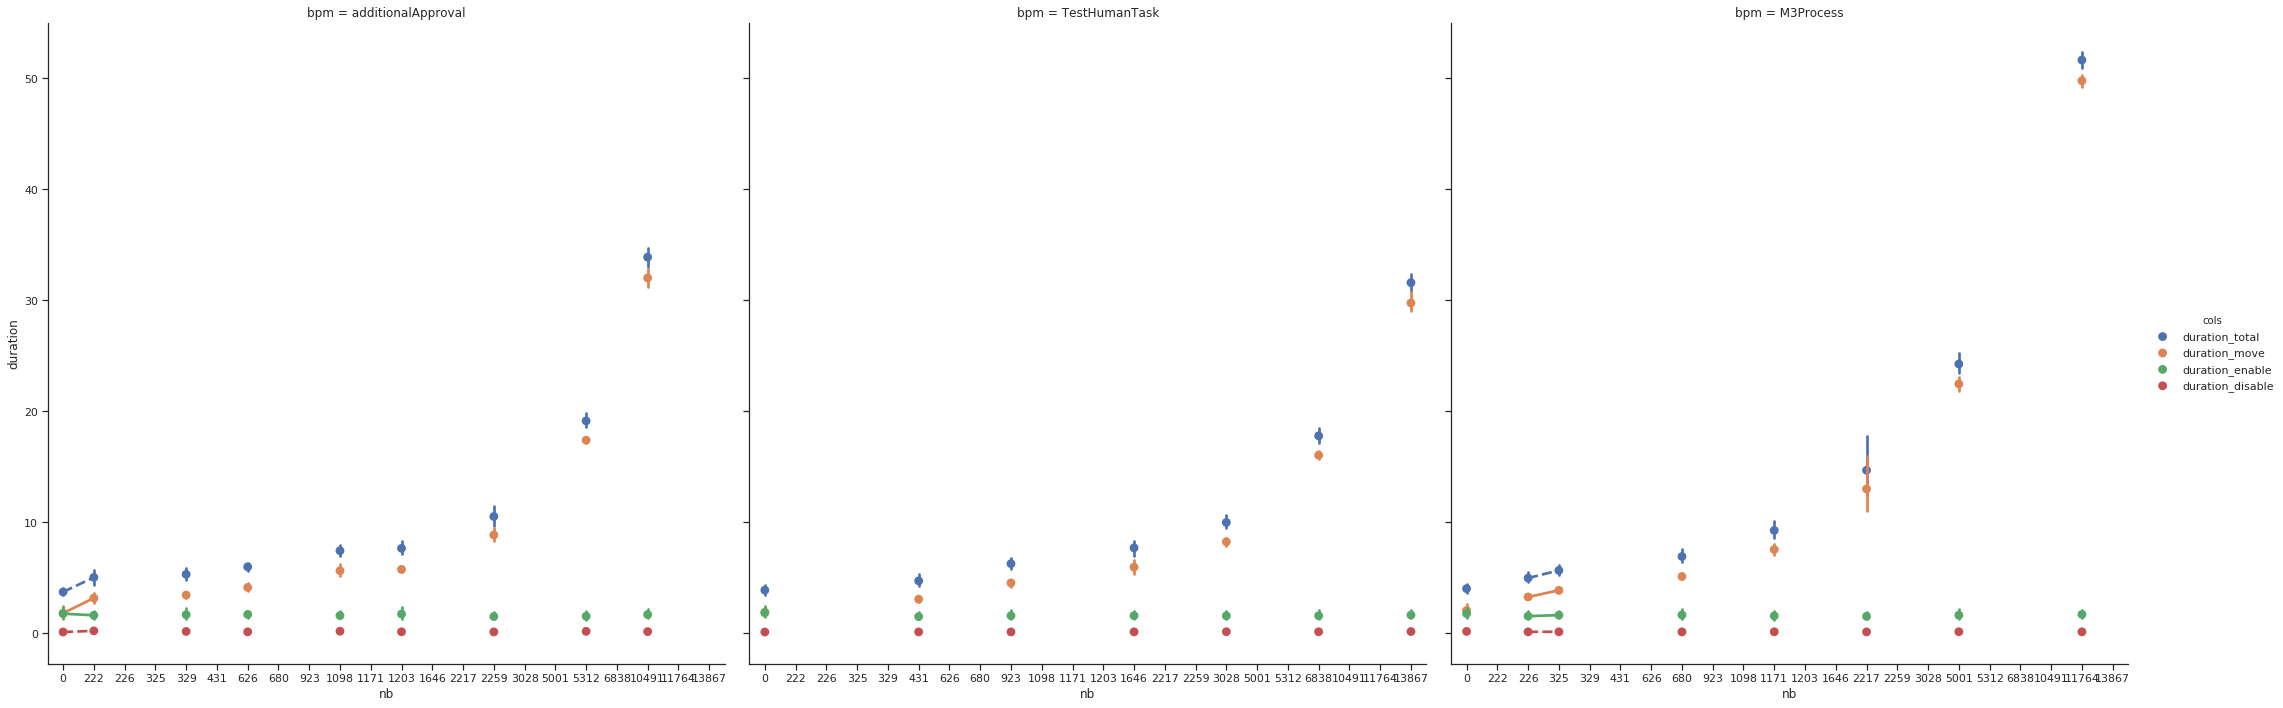

In [ ]:
sns.set(style="ticks")
sns.factorplot(x="nb", y="duration", hue="cols", col="bpm", data=d,size=10, linestyles=["--", "-","-","--"])

In [ ]:
kws = {"ls" : ["-","--","."]}
g = sns.FacetGrid(d, col="cols", col_wrap=2,hue="bpm",size=5, legend_out=False,hue_kws={"ls" : ["-","--", "-."]})

g.map(sns.lineplot, "nb", "duration", err_style="bars") ;
axes = g.axes.flatten()
axes[0].set_title("Total duration")
axes[0].set_ylabel("Duration (in seconds)")
axes[0].lines[1].set_linestyle("--")
axes[0].lines[2].set_linestyle("-.")
axes[1].set_title("Duration of tenant data copy")
axes[1].lines[1].set_linestyle("--")
axes[1].lines[2].set_linestyle("-.")
axes[2].set_title("Duration of tenant activation")
axes[2].set_ylabel("Duration (in seconds)")
axes[2].set_xlabel("Number of processes")
axes[2].lines[1].set_linestyle("--")
axes[2].lines[2].set_linestyle("-.")
axes[3].set_title("Duration of tenant desactivation")
axes[3].lines[1].set_linestyle("--")
axes[3].lines[2].set_linestyle("-.")
axes[3].set_xlabel("Number of processes")
axes[3].legend()


/home/guillaume/soft/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x="nb", y="duration_disable", hue="bpm", data=df_migr,ax=ax)
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x="nb", y="duration_enable", hue="bpm", data=df_migr)
fig, ax = plt.subplots(figsize=(12,4))


#df[df["index_launch"]>0].boxplot(by="nb", column="duration_enable")
sns.boxplot(x="nb", y="duration_enable", hue="bpm", data=df_migr[df_migr["index_launch"]>0])
ini_df = df_migr[df_migr["index_launch"]==0]
x = ini_df["nb"]
y = ini_df["duration_enable"]

sns.stripplot(x="nb", y="duration_enable",data=ini_df,  size=10, color="black", edgecolor="gray")

In [ ]:
plt.rcParams['figure.figsize'] = (12,5)
fig, axes = plt.subplots(ncols=2, sharey=True)
sns.boxplot(x="index_launch", y="duration_enable", hue="bpm", data=df_migr,ax=axes[0])
axes[0].set_title("Duration of tenant activation")
sns.boxplot(x="index_launch", y="duration_disable", hue="bpm", data=df_migr,ax=axes[1])
axes[1].set_title("Duration of tenant desactivation")
axes[0].legend().remove()
axes[0].set_ylabel("Duration (in seconds)")
axes[1].set_ylabel("")
axes[0].set_xlabel("Order of the launch")
axes[1].set_xlabel("Order of the launch")


## XP2 & XP3

In [ ]:
all_data = pd.read_csv(path + "xp3.csv")
all_data_restrict = all_data.loc[
    ((all_data.relative_task_end < all_data.begin_migr) 
    & (all_data.relative_task_end> all_data.begin_migr-60000)
    & (all_data.tenant != "tenant2")) | (all_data.is_migration == True)]
all_data_restrict = all_data_restrict[all_data_restrict.nb.isin([25,50,100,200,0])]

## XP2

In [ ]:
all_data_migrated_restricted = all_data[(all_data.tenant=="tenant2") & (all_data.duration< 200000) & (all_data.agentbpm_task_exec_restricted< 15000)
                                       &(all_data.nb.isin([25,50,100,200,0]))]
all_data_migrated_restricted.groupby(["bpm","type_y"])["duration"].describe()

## XP3

### Migration vs no migration (all data)

In [ ]:
for bpm in all_data_restrict["bpm"].unique():
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="duration", data=all_data_restrict[all_data_restrict["bpm"] == bpm], kind="box", margin_titles=True, size=5)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("Process duration (in seconds)")
    #axes[2].set_ylabel("Process duration (in seconds)")
    #axes[2].set_ylabel("Process duration (in seconds)")
    #axes[4].set_xlabel("Number of active processes")
    #axes[5].set_xlabel("Number of active processes")
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="bpms_task_exec", data=all_data_restrict[all_data_restrict["bpm"] == bpm], kind="box", margin_titles=True, size=5)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("BPM task duration (in seconds)")
    #axes[2].set_ylabel("Duration (in seconds)")
    #xes[2].set_ylabel("Duration (in seconds)")
    #axes[4].set_xlabel("Number of active processes")
    #axes[5].set_xlabel("Number of active processes")
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="agentbpm_task_exec_restricted", data=all_data_restrict[all_data_restrict["bpm"] == bpm], kind="box", margin_titles=True)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("Customer task duration (in seconds)")

### Migration vs no migration (restricted data : process duration < 200s & client task duration < 15s)

In [ ]:
all_data_restricted = all_data_restrict[(all_data_restrict.duration< 200000) & (all_data_restrict.agentbpm_task_exec_restricted< 15000) &(all_data_restrict.nb.isin([25,50,100,200,0]))]
for bpm in all_data_restricted["bpm"].unique():
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="duration", data=all_data_restricted[all_data_restricted["bpm"] == bpm], kind="box", margin_titles=True)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("Process duration (in seconds)")
    #axes[2].set_ylabel("Process duration (in seconds)")
    #axes[2].set_ylabel("Process duration (in seconds)")
    #axes[4].set_xlabel("Number of active processes")
    #axes[5].set_xlabel("Number of active processes")
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="bpms_task_exec", data=all_data_restricted[all_data_restricted["bpm"] == bpm], kind="box", margin_titles=True)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("BPM task duration (in seconds)")
    #axes[2].set_ylabel("Duration (in seconds)")
    #xes[2].set_ylabel("Duration (in seconds)")
    #axes[4].set_xlabel("Number of active processes")
    #axes[5].set_xlabel("Number of active processes")
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="agentbpm_task_exec_restricted", data=all_data_restricted[all_data_restricted["bpm"] == bpm], kind="box", margin_titles=True)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("Customer task duration (in seconds)")

In [ ]:
all_data_restricted.groupby(["bpm","tenant","is_migration"])["duration"].describe()